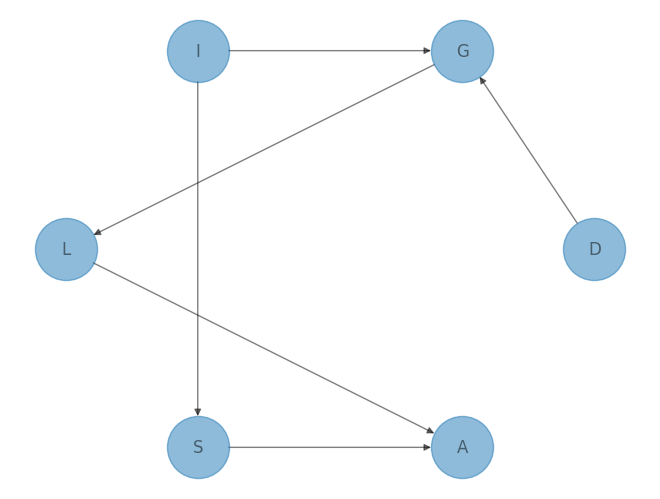

In [16]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx

student_model = DiscreteBayesianNetwork([('D', 'G'), ('I', 'G'), ('G', 'L'),
('I', 'S'), ('L','A'),('S','A')])

pos = nx.circular_layout(student_model)
nx.draw(student_model, with_labels=True, pos=pos, alpha=0.5, node_size=2000)

## Definirea variabilelor radacina:

In [17]:
CPD_D = TabularCPD(variable='D', variable_card=2, values=[[0.3], [0.7]])
print(CPD_D)
CPD_I = TabularCPD(variable='I', variable_card=2, values=[[0.2], [0.8]])
print(CPD_I)

+------+-----+
| D(0) | 0.3 |
+------+-----+
| D(1) | 0.7 |
+------+-----+
+------+-----+
| I(0) | 0.2 |
+------+-----+
| I(1) | 0.8 |
+------+-----+


## Definirea variabilor cu un parinte:

In [18]:
CPD_L = TabularCPD(variable='L', variable_card=2,
values=[[0.9, 0.6, 0.01],
[0.1, 0.4, 0.99]],
evidence=['G'],
evidence_card=[3])

CPD_S = TabularCPD(variable='S', variable_card=2,
values=[[0.8, 0.1],
[0.2, 0.9]],
evidence=['I'],
evidence_card=[2])

print(CPD_L, CPD_S, sep='\n')

+------+------+------+------+
| G    | G(0) | G(1) | G(2) |
+------+------+------+------+
| L(0) | 0.9  | 0.6  | 0.01 |
+------+------+------+------+
| L(1) | 0.1  | 0.4  | 0.99 |
+------+------+------+------+
+------+------+------+
| I    | I(0) | I(1) |
+------+------+------+
| S(0) | 0.8  | 0.1  |
+------+------+------+
| S(1) | 0.2  | 0.9  |
+------+------+------+


## Definirea variabilelor cu doi parinti:

In [19]:
CPD_G = TabularCPD(variable='G', variable_card=3,
values=[[0.3, 0.7, 0.02, 0.2],
[0.4, 0.25, 0.08, 0.3],
[0.3, 0.05, 0.9, 0.5]],
evidence=['I', 'D'],
evidence_card=[2, 2])

print(CPD_G)
CPD_A = TabularCPD(variable='A', variable_card=2,
values=[[0.9, 0.8, 0.7, 0.2],
[0.1, 0.2, 0.3, 0.8]],
evidence=['L', 'S'],
evidence_card=[2, 2])

print(CPD_A)

+------+------+------+------+------+
| I    | I(0) | I(0) | I(1) | I(1) |
+------+------+------+------+------+
| D    | D(0) | D(1) | D(0) | D(1) |
+------+------+------+------+------+
| G(0) | 0.3  | 0.7  | 0.02 | 0.2  |
+------+------+------+------+------+
| G(1) | 0.4  | 0.25 | 0.08 | 0.3  |
+------+------+------+------+------+
| G(2) | 0.3  | 0.05 | 0.9  | 0.5  |
+------+------+------+------+------+
+------+------+------+------+------+
| L    | L(0) | L(0) | L(1) | L(1) |
+------+------+------+------+------+
| S    | S(0) | S(1) | S(0) | S(1) |
+------+------+------+------+------+
| A(0) | 0.9  | 0.8  | 0.7  | 0.2  |
+------+------+------+------+------+
| A(1) | 0.1  | 0.2  | 0.3  | 0.8  |
+------+------+------+------+------+


## Adaugarea distributiilor conditionale la model:

In [20]:
student_model.add_cpds(CPD_D, CPD_I, CPD_S, CPD_G, CPD_L, CPD_A)
student_model.get_cpds()

[<TabularCPD representing P(D:2) at 0x29e89d8c1f0>,
 <TabularCPD representing P(I:2) at 0x29e8bded0d0>,
 <TabularCPD representing P(S:2 | I:2) at 0x29e88c9eba0>,
 <TabularCPD representing P(G:3 | I:2, D:2) at 0x29e88c9ec50>,
 <TabularCPD representing P(L:2 | G:3) at 0x29e8bded190>,
 <TabularCPD representing P(A:2 | L:2, S:2) at 0x29e8be20370>]

## Verificarea modelului:

In [22]:
student_model.check_model()

True

## Verificarea independentelor:

In [23]:
student_model.local_independencies(['D','G','S','I','L','A'])

(D ⟂ S, I)
(G ⟂ S | D, I)
(S ⟂ L, D, G | I)
(I ⟂ D)
(L ⟂ S, D, I | G)
(A ⟂ D, G, I | S, L)

## Inferenta:

In [24]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(student_model)
posterior_p = infer.query(["D","I"], evidence={"A": 1})
print(posterior_p)

+------+------+------------+
| D    | I    |   phi(D,I) |
+======+======+============+
| D(0) | I(0) |     0.0298 |
+------+------+------------+
| D(0) | I(1) |     0.3291 |
+------+------+------------+
| D(1) | I(0) |     0.0492 |
+------+------+------------+
| D(1) | I(1) |     0.5918 |
+------+------+------------+
